## Description of the Project:
### Background of the project:
This project entails the execution of an A/B test to assess the efficacy of a promotional banner highlighting GloBox's food and drink products on the company's e-commerce website. GloBox is an online marketplace renowned for its niche fashion items and upscale decor products, sourcing exceptional items from across the globe to provide customers with a unique shopping experience. In recent months, GloBox has expanded its food and beverage offerings and aims to elevate the category's revenue by raising awareness through a targeted marketing campaign.

![AD Campaign of Glovo](campaign.png)


### Context:
GloBox is an e-commerce company that has expanded its food and drink offerings and wants to bring greater awareness to this product category to increase revenue. The Growth team has proposed an A/B test to compare the performance of the company's website, with and without a promotional banner highlighting key food and drink products.

### Objective:
The <font color='orange'>**objective of this project is to increase revenue for GloBox's food and drink product category through an A/B test that aims to determine whether the presence of a promotional banner on the website's landing page can significantly influence customer purchase behavior**.</font>The team hopes to identify the version of the website that performs better in driving sales for the food and drink category, thus aiding in the formulation of an effective marketing strategy.

To achieve this objective, the Growth team has proposed an A/B test to showcase key products in the food and drink category by featuring a banner at the top of the website. The control group will not be exposed to the promotional banner, while the test group will see it. The experiment aims to determine whether the presence of the banner can significantly influence the purchase of food and drink products. By analyzing the results of the A/B test, the team hopes to identify the version of the website that performs better in driving sales for food and drink products, thus aiding in the formulation of an effective marketing strategy.

### The dataset:
The dataset for this project was obtained from a relational database accessed through the online database management platform, bit.io. Specifically, the GloBox e-commerce company's data was used, consisting of three tables - users, groups, and activity - which were explored to understand their structure. To consolidate the tables and ensure that all users were assigned to one A/B test group, SQL was used to compile the data into a single dataset. The compiled dataset was then exported in CSV format as 'Compiled_dataset.csv' for further analysis using Python. It should be noted that not all users in the dataset made a purchase, which is an important consideration for the analysis.


In the dataset, there were 48,943 unique participants, which were divided into two distinct groups. The first group, known as the control group, consisted of 24,343 participants who experienced the existing website without the banner. The second group, known as the treatment group, comprised 24,600 participants who were exposed to the website with the banner.


### The A/B test setup entails the following steps:

**Firstly**, the experiment is exclusively being conducted on GloBox's mobile website to ensure consistency and accuracy of the results. 

**Secondly**, upon visiting the GloBox main page, each user is randomly assigned to either the control or test group, which serves as their join date for the experiment.

**Thirdly**, the website landing page loads the promotional banner for the test group, while it does not load for the control group.

**Fourthly**, users may purchase products from the website at any time following their assignment to the test or control group. Any such purchases are considered a "conversion".

By implementing these steps, the A/B test aims to identify which version of the website, with or without the banner, drives greater conversions and generates more revenue for GloBox's food and drink product category.

### Project deliverables:
The project deliverables are as follows:

**Analysis Plan:** A detailed analysis plan that will be reviewed and approved by the team. This plan will outline the approach, methodology, and statistical tests used to analyze the A/B test results.

**A/B Test Results:** A comprehensive report that analyzes the A/B test results to determine whether or not the experiment was successful. This report will include a summary of the key performance indicators (KPIs) used to measure success, such as conversion rates, revenue generated, and any other relevant metrics.

**Presentation:** A recorded presentation that summarizes the A/B test results and provides recommendations for improving the company's marketing strategy based on the findings. The presentation will include visual aids, such as charts and graphs, to illustrate the results of the A/B test.

Overall, these deliverables will provide the GloBox team with valuable insights into the performance of their food and drink product category and inform their future marketing efforts.


### Recommendations:

Based on our analysis, while the conversion rate shows statistical significance, we would advise against launching the banner on the website. Our recommendation is based on the fact that the observed change in the average amount per user spent, resulting from the conversion rate, is not statistically significant enough to yield a substantial increase in sales. Therefore, we propose either not launching the banner or conducting another test with a larger sample size to arrive at a more definitive conclusion.


### Importing necessary Libraries for Analysing the Dataset

In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy.stats import t
from scipy import stats as s
from scipy.stats import norm
import matplotlib.pyplot as plt

### Loading the Dataset:
#### Data Collection and Preparation Process for GloBox A/B Test Project
The dataset for this project was obtained from a relational database accessed through the online database management platform, bit.io. Specifically, the GloBox e-commerce company's data was used, consisting of three tables - users, groups, and activity - which were explored to understand their structure. To consolidate the tables and ensure that all users were assigned to one A/B test group, SQL was used to compile the data into a single dataset. The compiled dataset was then exported in CSV format as 'Compiled_dataset.csv' for further analysis using Python. It should be noted that not all users in the dataset made a purchase, which is an important consideration for the analysis.

In [2]:
### 'df' denotes dataframe
df= pd.read_csv('Compiled_dataset.csv')
df.head()

,uid,group,join_dt,device,id,country,gender,uid.1,dt,device.1,spent
0,1000000,B,2023-01-28,I,1000000,CAN,M,NaN,NaN,NaN,NaN
1,1000001,A,2023-01-27,A,1000001,BRA,M,NaN,NaN,NaN,NaN
2,1000002,A,2023-02-01,A,1000002,FRA,M,NaN,NaN,NaN,NaN
3,1000003,B,2023-01-25,I,1000003,BRA,M,NaN,NaN,NaN,NaN
4,1000004,A,2023-02-04,A,1000004,DEU,F,NaN,NaN,NaN,NaN


In [3]:
### Displaying the summary of a dataframe's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49082 entries, 0 to 49081
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uid       49082 non-null  int64  
 1   group     49082 non-null  object 
 2   join_dt   49082 non-null  object 
 3   device    48787 non-null  object 
 4   id        49082 non-null  int64  
 5   country   48435 non-null  object 
 6   gender    42200 non-null  object 
 7   uid.1     2233 non-null   float64
 8   dt        2233 non-null   object 
 9   device.1  2223 non-null   object 
 10  spent     2233 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.1+ MB


In [4]:
### Creating a new dataframe (df_new) that includes only the necessary columns from the original dataset
df_new= df[['uid','join_dt','group','device','country','gender','spent']]

### Not all the customers made a purchase, hence filling the NaN valuses with 0
df_new['spent']=df_new['spent'].fillna(0)

### some of the values in these columns were missing, hence filling those fields with 'Missing' values
df_new[['gender','country','device']]= df_new[['gender','country','device']].fillna('Missing')

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4192/2548660870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['spent']=df_new['spent'].fillna(0)
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##### Question 1: What is the average amount spent per user for the control and treatment groups?

In [5]:
### Removing the duplicated user's id from the dataset and including how much each custimer spent in total
each_customer_spent= df_new.groupby(['uid','group'])['spent'].sum().reset_index()

### Finding the average amount spent per user in both groups (Control='A' & Treatment= 'B')
control_treatment_mean= each_customer_spent.groupby('group')['spent'].mean().reset_index()


##### Question 2: What is the 95% confidence interval for the average amount spent per user in the control?

Using the one-sample t-interval for means

In [6]:
### Defining the level of significance
alpha=1-.95

### Outlaying the average amount spent per user in control group
control_mean=control_treatment_mean[control_treatment_mean['group']== 'A']['spent'][0]

### creating a dataframe that includes data (coulmns: user id, group, spent) for only the customers from the control group
control_group_df= each_customer_spent[each_customer_spent['group']=='A']

### Sample size for the control group
n_control_group= control_group_df[control_group_df['group']=='A']['uid'].count()

### Defining the standard deviation (Standard Error) of the control group
control_std=control_group_df['spent'].std()

### Degrees of freedom for the control group
degrees_of_freedom= n_control_group-1

### Finding the critical T-score
t_score= s.t.ppf(1 - alpha/2, degrees_of_freedom)

### Calculating the Confidence Interval of the Control Group (based on Control group's average ampunt spent per user)
confidence_interval_control_mean_higher_bound= control_mean+t_score*control_std/m.sqrt(n_control_group)
confidence_interval_control_mean_lower_bound= control_mean-t_score*control_std/m.sqrt(n_control_group)

### Printing the lower and the upper bound of the Confidence Interval
print(("The 'Lower' and the 'Upper' bound of the Confidence Interval: ",confidence_interval_control_mean_lower_bound,confidence_interval_control_mean_higher_bound))

("The 'Lower' and the 'Upper' bound of the Confidence Interval: ", 3.0486876385878507, 3.7003492972698315)


##### Question 3: What is the 95% confidence interval for the average amount spent per user in the treatment?
Using the one-sample t-interval for means

In [7]:
### Outlaying the average amount spent per user in treatment group
treatment_mean=control_treatment_mean[control_treatment_mean['group']== 'B']['spent'][1]

### creating a dataframe that includes data (coulmns: user id, group, spent) for only the customers from the treatment group
treatment_group_df= each_customer_spent[each_customer_spent['group']=='B']

### Sample size for the treatment group
n_treatment_group= treatment_group_df[treatment_group_df['group']=='B']['uid'].count()

### Defining the standard deviation (Standard Error) of the treatment group
treatment_std=treatment_group_df['spent'].std()

### Degrees of freedom for the treatment group
degrees_of_freedom= n_treatment_group-1

### Finding the critical T-score
t_score= s.t.ppf(1 - alpha/2, degrees_of_freedom)

### Calculating the Confidence Interval of the treatment Group (based on Treatment group's average ampunt spent per user)
confidence_interval_control_mean_higher_bound= treatment_mean+t_score*treatment_std/m.sqrt(n_treatment_group)
confidence_interval_control_mean_lower_bound= treatment_mean-t_score*treatment_std/m.sqrt(n_treatment_group)

### Printing the lower and the upper bound of the Confidence Interval
print(("The 'Lower' and the 'Upper' bound of the Confidence Interval: {} - {}".format(confidence_interval_control_mean_lower_bound,confidence_interval_control_mean_higher_bound)))

The 'Lower' and the 'Upper' bound of the Confidence Interval: 3.0732696431556232 - 3.7084642486159436


##### Question 4: Conduct a hypothesis test to see whether there is a difference in the average amount spent per user between the two groups. What are the resulting p-value and conclusion?

Using the t distribution and a 5% significance level. Assuming unequal variance.

                             H0: Control mean = Treatment mean
                             H1: Control mean ≠ Treatment mean


In [8]:
### Differences of mean between these two groups
mean_difference= treatment_mean-control_mean

### Standard Error for the Mean difference
se=np.sqrt(((control_std**2)/(n_control_group)) + ((treatment_std**2)/(n_treatment_group)))

### Calculated t-score for the mean difference
t_score_mean_difference= mean_difference/se

### Degrees of Freedom for the two groups
cum_degrees_freedom= (n_treatment_group+n_control_group)-1

### Calculating p-value for the mean difference
p_value=(1-t.cdf(t_score_mean_difference, cum_degrees_freedom))*2

### Pring the p-value, level of significance and comparison between p-value and level of significance
print('p_value: ', p_value); print('alpha: ', alpha); print('p_value > alpha: ', p_value, '>', alpha)

### The decision:            
print("The decision: As the p-value {} is way larger than our level of significane {}, the differene of mean bewteen these two groups is not statistically significant, hence we cant reject the null hypothesis which implies that the average amount spent per user in the control and treatment group is the same and the banner doesn't make any difference. This suggests us not to proceed with the change.". format(p_value,alpha))


p_value:  0.9438557528933296
alpha:  0.050000000000000044
p_value > alpha:  0.9438557528933296 > 0.050000000000000044
The decision: As the p-value 0.9438557528933296 is way larger than our level of significane 0.050000000000000044, the differene of mean bewteen these two groups is not statistically significant, hence we cant reject the null hypothesis which implies that the average amount spent per user in the control and treatment group is the same and the banner doesn't make any difference. This suggests us not to proceed with the change.


##### Question 5: What is the 95% confidence interval for the difference in the average amount spent per user between the treatment and the control (treatment-control)? 
Use the t distribution and assume unequal variance.


In [9]:
### Differences of mean between these two groups
mean_difference

### Calculating the t-score for the two groups 
t_score= s.t.ppf(1 - alpha/2, degrees_of_freedom)

### Standard Error for the Mean difference
se

### Calculating the Confidence Interval for the difference in the mean amount spent per user between the treatment and the control
CI_mean_difference_higher_bound= mean_difference+t_score*se
CI_mean_difference_lower_bound= mean_difference-t_score*se


print("Confidence Interval for the difference in the mean anount spent is: {}  to   {}".format(CI_mean_difference_lower_bound,CI_mean_difference_higher_bound))

print("The Decision:")
print("The confidence interval for the mean difference of the amount spent by the control and treatment groups ranges from {} to {} Since the lower bound includes 0, it suggests that there is a possibility that the population mean difference may fall into zero, indicating that there might be no impact of the change. This also implies that there might be no difference between the mean amount spent by either group. Furthermore, our p-value for the mean difference does not provide enough evidence to reject the null hypothesis, which states that the difference between the means is not statistically significant. Therefore, it is not recommended to implement the change as there is no statistically significant difference in the spending behavior between the control and treatment groups.".format(CI_mean_difference_lower_bound,CI_mean_difference_higher_bound))

Confidence Interval for the difference in the mean anount spent is: -0.43866104473639217  to   0.4713580006502767
The Decision:
The confidence interval for the mean difference of the amount spent by the control and treatment groups ranges from -0.43866104473639217 to 0.4713580006502767 Since the lower bound includes 0, it suggests that there is a possibility that the population mean difference may fall into zero, indicating that there might be no impact of the change. This also implies that there might be no difference between the mean amount spent by either group. Furthermore, our p-value for the mean difference does not provide enough evidence to reject the null hypothesis, which states that the difference between the means is not statistically significant. Therefore, it is not recommended to implement the change as there is no statistically significant difference in the spending behavior between the control and treatment groups.


##### Question 6: What is the user conversion rate for the control and treatment groups?
 calculating the control and treatment groups' coversion rate (proportion)
 



In [10]:
### control group proportion (conversion rate): 
n_control_group ## Total size of the control group 
control_converted_customer= each_customer_spent[(each_customer_spent['group']=='A') & (each_customer_spent['spent']>0)].shape[0] ## Number of converted customers in the control group
control_converted_proportion= control_converted_customer/n_control_group ## Conversion rate in the control group


### treatment group proportion: 
n_treatment_group ## Total size of the treatment group 
treatment_converted_customer= each_customer_spent[(each_customer_spent['group']=='B') & (each_customer_spent['spent']>0)].shape[0] ## Number of converted customers in the treatment group
treatment_converted_proportion= treatment_converted_customer/n_treatment_group ## Conversion rate in the treatment group

print('conversion rate for control group is: ', control_converted_proportion*100)
print('conversion rate for treatment group is: ', treatment_converted_proportion*100)

conversion rate for control group is:  3.9230990428459926
conversion rate for treatment group is:  4.630081300813008


##### Question 7: What is the 95% confidence interval for the conversion rate of users in the control?
Using a one-sample z-interval for proportions assuming the distribution is normal


In [11]:
### Statistics needed for calculating the confidence interval for the conversion rate of users in the control
control_converted_proportion ## Conversion rate in the treatment group
t_score ## Z-score
control_not_converted_proportion= 1-control_converted_proportion ## proporting not converted in the control group

confidence_interval_control_proportion_higher_bound=  control_converted_proportion+ t_score * np.sqrt(control_converted_proportion*control_not_converted_proportion/n_control_group)
confidence_interval_control_proportion_lower_bound= control_converted_proportion- t_score * np.sqrt(control_converted_proportion*control_not_converted_proportion/n_control_group)
print('Confidence interval for control proportion: {}  to  {}.'.format(confidence_interval_control_proportion_lower_bound,confidence_interval_control_proportion_higher_bound))

Confidence interval for control proportion: 0.03679201996899026  to  0.0416699608879296.


##### Question 7: What is the 95% confidence interval for the conversion rate of users in the control?
Using a one-sample z-interval for proportions assuming the distribution is normal

In [12]:
### Statistics needed for calculating the confidence interval for the conversion rate of users in the control
treatment_converted_proportion ## Conversion rate in the treatment group
t_score ## Z-score
treatment_not_converted_proportion= 1-treatment_converted_proportion ## proporting not converted in the control group

confidence_interval_treatment_proportion_higher_bound=  treatment_converted_proportion+ t_score * np.sqrt(treatment_converted_proportion*treatment_not_converted_proportion/n_treatment_group)
confidence_interval_treatment_proportion_lower_bound= treatment_converted_proportion- t_score * np.sqrt(treatment_converted_proportion*treatment_not_converted_proportion/n_treatment_group)
print('Confidence interval for treatment proportion: {}  to  {}.'.format(confidence_interval_treatment_proportion_lower_bound,confidence_interval_treatment_proportion_higher_bound))

Confidence interval for treatment proportion: 0.043674769473172705  to  0.04892685654308746.


##### Question 8: Conduct a hypothesis test to see whether there is a difference in the conversion rate between the two groups. What are the resulting p-value and conclusion? This question is required.*
Use the normal distribution and a 5% significance level. Use the pooled proportion for the standard error.

                         H0: Convertion rate (proportion) of control group = Convertion rate (proportion) of treatment group
                         H1: Convertion rate (proportion) of control group ≠ Convertion rate (proportion) of treatment group

In [13]:
### Difference of proportion converted (conversion rate) bewteen the control and the treatment group
proportion_difference= treatment_converted_proportion- control_converted_proportion

### pooled proportion for the standard error (for difference of proportion)
pooled_proportion_se= np.sqrt((treatment_converted_proportion*treatment_not_converted_proportion/n_treatment_group)+(treatment_converted_proportion*treatment_not_converted_proportion/n_treatment_group))

### Calculated Z-score
calculated_z_score= proportion_difference/pooled_proportion_se

### P-value for the difference in the proportion (conversion rate)
p_value_proportion= 2 * s.norm.sf(abs(calculated_z_score))


print('p value is: {}'.format(p_value_proportion))
print('level of significance is: {}'.format(1-(1-alpha)))
print('p_value < alpha: {} < {}.'.format(p_value_proportion, 1-(1-alpha)))
print('The decision based on proportion difference is below:')
print("The p-value {} is below the level of significance {}, which indicates that there is a statistically significant difference between the conversion rate (difference in proportion) of the control and treatment groups. Therefore, we can reject the null hypothesis that implies that the conversion rate (proportion) of the control group and conversion rate (proportion) of the treatment group is the same or there is no difference. Instead, we can conclude that the banner has a significant impact on the conversion rate. This suggests that we can proceed with the change and add the banner to the website if we want to increase our conversion rate.".format(p_value_proportion, 1-(1-alpha)))



p value is: 0.00019048844081203466
level of significance is: 0.050000000000000044
p_value < alpha: 0.00019048844081203466 < 0.050000000000000044.
The decision based on proportion difference is below:
The p-value 0.00019048844081203466 is below the level of significance 0.050000000000000044, which indicates that there is a statistically significant difference between the conversion rate (difference in proportion) of the control and treatment groups. Therefore, we can reject the null hypothesis that implies that the conversion rate (proportion) of the control group and conversion rate (proportion) of the treatment group is the same or there is no difference. Instead, we can conclude that the banner has a significant impact on the conversion rate. This suggests that we can proceed with the change and add the banner to the website if we want to increase our conversion rate.


##### Question 9: What is the 95% confidence interval for the difference in the conversion rate between the treatment and control (treatment-control)? This question is required.*
Using a two-sample two-tailed z-interval for a difference in proportions. Assuming equal proportions, we use the pooled standard error.

In [14]:
### Difference of proportion converted (conversion rate) bewteen the control and the treatment group
proportion_difference

### Critical Z-score
z_score = norm.ppf(1 - alpha/2)

### Standard Error for the difference in the conversion rate between the treatment and control (pooled standard error)
se_proportion_difference= np.sqrt((control_converted_proportion*control_not_converted_proportion/n_control_group)+(treatment_converted_proportion*treatment_not_converted_proportion/n_treatment_group))

### Merginal error for the difference in the conversion rate between the treatment and control 
me_proportion_difference= z_score*se_proportion_difference

### confidence interval for the difference in the conversion rate between the treatment and control 
confidence_interval_proportion_difference_higher_bound= proportion_difference+me_proportion_difference
confidence_interval_proportion_difference_lower_bound=proportion_difference-me_proportion_difference
print('confidence interval for proportion difference (conversion rate) is: {} to {}'. format(confidence_interval_proportion_difference_lower_bound,confidence_interval_proportion_difference_higher_bound))
print('The decison:')
print("The confidence interval for the conversion rate shows that both the lower and upper bounds are positive, ranging from 0.0034860511629807105 to 0.0106535939963596. This means that 95% of the time, the true conversion rate in the population will fall within this range and will be positive, indicating a high likelihood that the banner will have a positive impact on the conversion rate. As both ends of the confidence interval are positive, we can conclude that the banner will likely have a positive impact on the conversion rate. Furthermore, the difference in conversion rate between the control and treatment groups is statistically significant, as evidenced by the p-value for the difference in proportion of conversions. This provides strong evidence against the null hypothesis, which assumes no difference in conversion rate between the groups, and suggests that a difference does indeed exist. Thus, we can conclude that installing the banner on the website will likely increase the conversion rate, and should be considered to improve website performance.")

confidence interval for proportion difference (conversion rate) is: 0.0034860511629807105 to 0.0106535939963596
The decison:
The confidence interval for the conversion rate shows that both the lower and upper bounds are positive, ranging from 0.0034860511629807105 to 0.0106535939963596. This means that 95% of the time, the true conversion rate in the population will fall within this range and will be positive, indicating a high likelihood that the banner will have a positive impact on the conversion rate. As both ends of the confidence interval are positive, we can conclude that the banner will likely have a positive impact on the conversion rate. Furthermore, the difference in conversion rate between the control and treatment groups is statistically significant, as evidenced by the p-value for the difference in proportion of conversions. This provides strong evidence against the null hypothesis, which assumes no difference in conversion rate between the groups, and suggests that a dif

In [20]:
print("The final decision:")
print("Based on our analysis, while the conversion rate shows statistical significance, we would advise against launching the banner on the website. Our recommendation is based on the fact that the observed change in the average amount per user spent, resulting from the conversion rate, is not statistically significant enough to yield a substantial increase in sales. Therefore, we propose either not launching the banner or conducting another test with a larger sample size to arrive at a more definitive conclusion.")

The final decision:
Based on our analysis, while the conversion rate shows statistical significance, we would advise against launching the banner on the website. Our recommendation is based on the fact that the observed change in the average amount per user spent, resulting from the conversion rate, is not statistically significant enough to yield a substantial increase in sales. Therefore, we propose either not launching the banner or conducting another test with a larger sample size to arrive at a more definitive conclusion.


### Visualizing the Result

##### Visualizing the Mean amount spent per customer in the Control and the Treatment Group

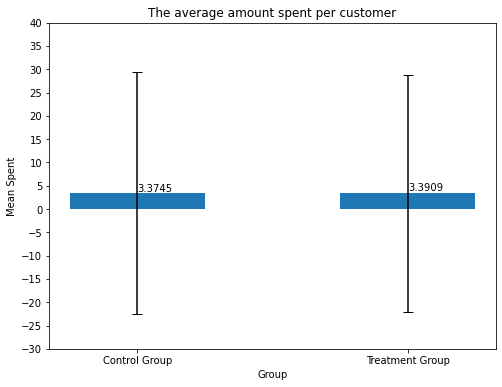

In [21]:
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of the 'spent' column for each group
means = each_customer_spent.groupby('group')['spent'].mean().values.tolist()
stds = each_customer_spent.groupby('group')['spent'].std().values.tolist()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))  # set figure size

# Create the bar chart with error bars
ax.bar(['Control Group', 'Treatment Group'], means, yerr=stds, capsize=5, width=0.5)

# Add labels to the means
for i, mean in enumerate(means):
    ax.text(i, mean + 0.5, f'{mean:.4f}', ha='left')

# Set the axis labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Mean Spent')
ax.set_title('The average amount spent per customer')

# Set the Y axis limits
ax.set_ylim(-30, 40)

# Set Y ticker
ax.set_yticks(range(-30, 41, 5))


# Display the plot
plt.show();


##### ##### Visualizing the Conversion Rate in Control and Treatment Groups

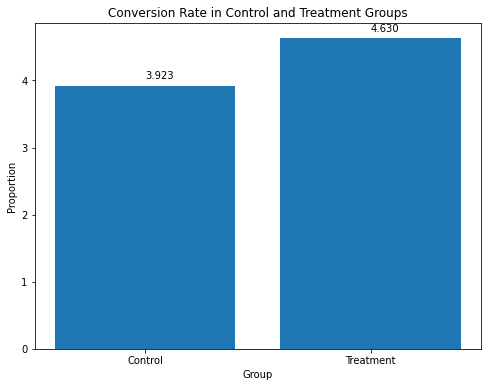

In [17]:
# defining the conversions rate
control_convertion= control_converted_proportion*100
treatment_proportion=treatment_converted_proportion*100
proportions=[control_convertion,treatment_proportion]

# defining the lables
labels = ['Control', 'Treatment']

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
ax.bar(labels, proportions)

# Add labels to the bars
for i, prop in enumerate(proportions):
    ax.text(i, prop + 0.1, f'{prop:.3f}')

# Set the axis labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Proportion')
ax.set_title('Conversion Rate in Control and Treatment Groups')

# Display the plot
plt.show()


0.7069822579670155